In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  confusion_matrix
import seaborn as sns
from knn import KNN


In [2]:
bc = load_breast_cancer()
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
df = pd.DataFrame(data= bc.data , columns=bc.feature_names)
df['targets'] = pd.Series(bc.target)
df["result"] = df['targets'].apply(lambda x: 'Malignant' if x == 1 else ('benign'))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,targets,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,benign


In [4]:
x_train , x_test , y_train , y_test = train_test_split(bc.data , bc.target , test_size= 0.2  , shuffle=True)
print("x , y train :" , x_train.shape , y_train.shape)
print("x , y test  :" , x_test.shape  , y_test.shape)

x , y train : (455, 30) (455,)
x , y test  : (114, 30) (114,)


In [5]:
knn = KNN(13)
knn.fit(x_train , y_train)
acc = knn.evaluate(x_test , y_test)
acc

0.9298245614035088

k|  3 |  5  |  7 |  9  | 11 |  13
| --- | --- | --- | --- | --- | --- | --- |
Accuracy  |  0.9122 | 0.9473 | 0.9385 | 0.964 | 0.9210 | 0.929

## Calculate confusion matrix for test dataset

In [6]:
Y_prediction = knn.predict(x_test)
print("accuracy:", accuracy_score(y_test, Y_prediction))


accuracy: 0.9298245614035088


confusion matrix:
[[26  6]
 [ 2 80]]


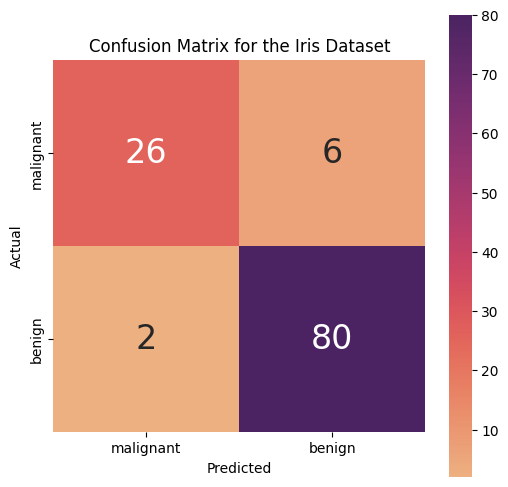

In [7]:
conf_mat = confusion_matrix(y_test, Y_prediction)
print("confusion matrix:", conf_mat, sep="\n")

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax = sns.heatmap(conf_mat, annot=True, square=True , xticklabels=bc.target_names  ,  yticklabels=bc.target_names  ,  fmt='g', cmap="flare" , annot_kws={"size": 24})
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix for the Iris Dataset')
plt.show()